In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [2]:
cifar10 = tf.keras.datasets.cifar10 # O nome do dataset possui 10 no final, pois ele possui 10 classes

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten() # Aplica-se o flatten por conta de que os labels estão em um array 2D
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [4]:
K = len(set(y_train)) # Número de classes
print("Número de classes:", K)

Número de classes: 10


In [5]:
# Construindo o modelo
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i) # Um filtro 3x3 reduzirá as imagens pela metade
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x) # Note o aumento do número de filtros

# ESSA REDE SE BASEIA NO VGG
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i) # padding='same' mantém o tamanho da imagem
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x) # Dropout para evitar overfitting
# (Durante as aulas, o autor disse que pode não ser interessante usar dropout em CNNs,
# por conta de perder informações da imagem)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x) # Camada de planarização
# Camada densa
x = Dropout(0.2)(x) # Dropout para evitar overfitting (Durante as aulas, o autor disse que pode não ser interessante usar dropout em CNNs)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x) # Utilizamos a função softmax para a camada de saída (classificação multiclasse)

model = Model(i, x) # Criando o modelo

In [6]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - accuracy: 0.4459 - loss: 1.7762 - val_accuracy: 0.6081 - val_loss: 1.1565
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6888 - loss: 0.8995 - val_accuracy: 0.6760 - val_loss: 0.9772
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7528 - loss: 0.7095 - val_accuracy: 0.7428 - val_loss: 0.7593
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7969 - loss: 0.5854 - val_accuracy: 0.7459 - val_loss: 0.7564
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8313 - loss: 0.4892 - val_accuracy: 0.7927 - val_loss: 0.6429
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8588 - loss: 0.4101 - val_accuracy: 0.7979 - val_loss: 0.6285
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8804 - loss: 0.3452 - val_accuracy: 0.8110 - val_loss: 0.6200
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9024 - loss: 

In [ ]:
# Utilizando augmentation para melhorar o modelo já treinado
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

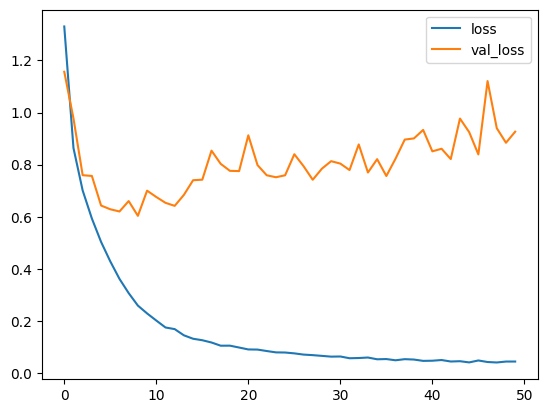

In [14]:
# Visualizando as taxas de erro por iteração
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

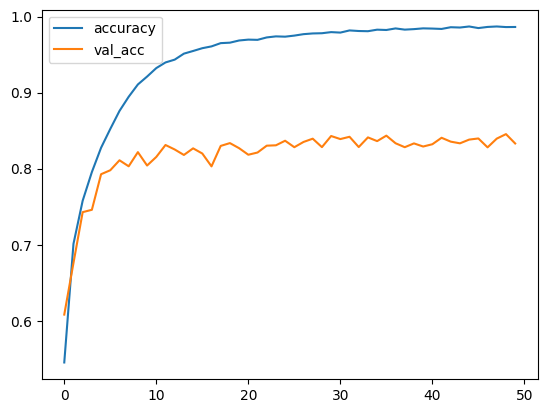

In [8]:
# Visualizando as taxas de erro e acurácia
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Confusion matrix, without normalization
[[911  13  19  11  10   7   3   7   9  10]
 [ 13 944   1   2   1   4   2   1   4  28]
 [ 61   1 742  37  68  52  20  17   1   1]
 [ 22   5  53 663  47 155  25  20   3   7]
 [  9   0  31  30 854  33  21  18   3   1]
 [  7   1  28  87  30 814   7  26   0   0]
 [  9   3  48  46  24  29 831   5   4   1]
 [ 10   1  16  22  38  40   3 866   0   4]
 [ 82  36  14  11   6   5   1   5 823  17]
 [ 26  55   7   9   3   5   3   4   5 883]]


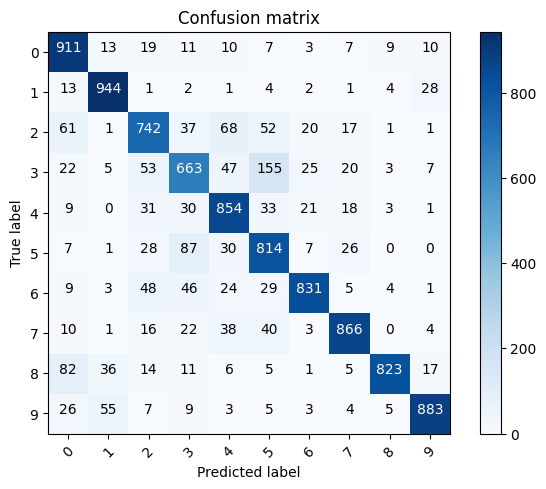

In [9]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, # Matriz de confusão
                          classes, # Classes
                          normalize=False, # Normalização
                          title='Confusion matrix',
                          cmap=plt.cm.Blues # Cor
                          ):
    # Normalização da matriz (nesse caso não será normalizada por conta do parametro)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)

    # Plotagem da matriz de confusão
    plt.imshow(cm, interpolation='nearest', cmap=cmap) # Imagem da matriz de confusão
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) # Marcas
    plt.xticks(tick_marks, classes, rotation=45) # Rótulos do eixo x com rotação
    plt.yticks(tick_marks, classes) # Rótulos do eixo y

    # Formatação dos números
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2. # Limiar para a cor do texto
    # Adicionando texto na matriz de confusão
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else 'black')

    # Adicionando rótulos
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Fazendo a predição
p_test = model.predict(x_test).argmax(axis=1)
# gerando a matriz de confusão
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [15]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: dog Predicted: cat')

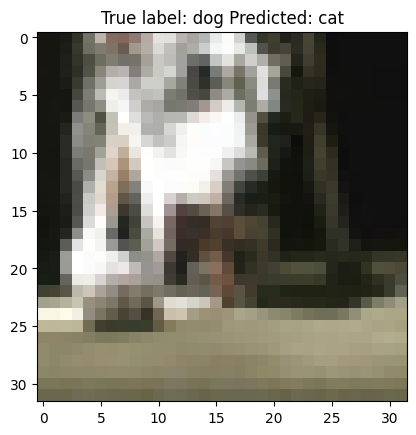

In [18]:
# Mostrando classificações incorretas
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))

In [19]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,189,888 (27.43 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 4,792,662 (18.28 MB)